# 프로젝트 2주차 과제- EDA 코드 제출
- 팀: 0 조
- 팀원: 김소망, 이사랑, 박믿음

## 1. 데이터 로드

In [2]:
import pandas as pd

In [3]:
CO2EMMISIONPATH = "data/co-emissions-per-capita.csv"
CARSALESPATH = "data/global-car-sales-by-key-markets-2005-2020.csv"
EVSALESPATH = "data/global-electric-car-sales-by-key-markets-2010-2020.csv"

In [4]:
co2Emission = pd.read_csv(CO2EMMISIONPATH)
co2Emission

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,Afghanistan,AFG,1949,0.0019
1,Afghanistan,AFG,1950,0.0109
2,Afghanistan,AFG,1951,0.0117
3,Afghanistan,AFG,1952,0.0115
4,Afghanistan,AFG,1953,0.0132
...,...,...,...,...
23302,Zimbabwe,ZWE,2016,0.7653
23303,Zimbabwe,ZWE,2017,0.6730
23304,Zimbabwe,ZWE,2018,0.8210
23305,Zimbabwe,ZWE,2019,0.7476


In [36]:
carSales = pd.read_csv(CARSALESPATH, index_col=0)\
    .drop(columns=["World (2020 H1)", "World (2020 H2)"])\
    .drop([2020])\
    .rename(columns={"United States" : "USA", "European Union": "Europe"})\
    [["China", "USA", "Europe", "Japan", "Rest of the world"]]
carSales

,China,USA,Europe,Japan,Rest of the world
2005,4.940918,16.959718,17.163429,4.249767,15.404695
2006,6.259026,16.526294,17.473473,4.005003,16.541758
2007,7.589375,16.104484,17.777736,3.718892,18.781187
2008,8.151446,13.203105,16.370741,3.493202,19.487257
2009,12.458877,10.408939,15.306547,3.225547,17.322512
2010,16.497832,11.559140,14.698683,3.556993,20.583228
2011,16.998333,12.734443,14.649122,2.953526,22.502121
2012,17.762557,14.494295,13.373661,2.060791,23.663578
2013,20.270478,15.600521,13.177625,2.058111,23.650415
2014,21.792541,16.523862,14.012394,2.124088,23.329490


In [24]:
evSales = pd.read_csv(EVSALESPATH, index_col=0)\
    .drop(columns=["World", "Market Share"])\
    .drop([2020])
evSales

,China,USA,Europe,Japan,Rest of the world
2010,0.001551,0.001201,0.004124,0.002442,0.000521
2011,0.005403,0.017907,0.013026,0.013471,0.002310
2012,0.010422,0.054061,0.034262,0.026924,0.003212
2013,0.015891,0.097775,0.066101,0.030943,0.004693
2014,0.073890,0.120255,0.104497,0.033332,0.009205
2015,0.219845,0.115518,0.197901,0.025480,0.013575
2016,0.374400,0.159616,0.220660,0.025012,0.023017
2017,0.646217,0.198349,0.310620,0.054425,0.048692
2018,1.165295,0.361315,0.404295,0.050028,0.109470
2019,1.102956,0.326644,0.587706,0.039421,0.114666


## 2. 데이터 분석

In [15]:
import matplotlib.pyplot as plt

### 2.1. 주요 자동차 시장에서 전기자동차 점유율은 어떻게 변화해 왔을까?

In [77]:
COUNTRIES = list(evSales.columns)
YEARS = list(evSales.index)

evShare = evSales.loc[YEARS, COUNTRIES] / carSales.loc[YEARS, COUNTRIES] * 100
evShare

,China,USA,Europe,Japan,Rest of the world
2010,0.009399,0.010390,0.028057,0.068653,0.002531
2011,0.031786,0.140619,0.088921,0.456099,0.010266
2012,0.058677,0.372981,0.256190,1.306489,0.013574
2013,0.078393,0.626742,0.501615,1.503466,0.019843
2014,0.339061,0.727766,0.745747,1.569238,0.039456
2015,0.950644,0.661043,1.286096,0.760775,0.061355
2016,1.420041,0.908466,1.340511,0.727833,0.105022
2017,2.396919,1.150479,1.848531,1.512301,0.212569
2018,4.363752,2.084335,2.388813,1.396497,0.482610
2019,4.495587,1.915918,3.417938,1.119904,0.544313


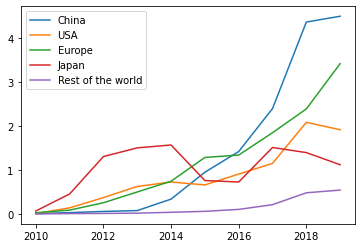

In [78]:
evShare.plot(y=COUNTRIES)
plt.xlabel("share")
plt.show("")

전체적으로 전기자동차의 점유을은 지난 10년간 모든 주요 시장에서 증가한 것을 확인할 수 있다. 그런데 그 중 일본에서만 유일하게 예외적으로 전기차 판매량이 계속 증가와 감소를 반복하며 변화하는 양상이 나타났다.
또한 전기자동차 점유율이 가장 높은 곳은 중국이었으며, 일본을 제외하면 중국, 유럽, 미국 순으로 높았다.

## 타이틀 추가~